In [142]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [143]:
points_n = 200
clusters_n = 3
iteration_n = 100
dimension = 2

In [144]:
points = tf.constant(np.random.uniform(0, 10, (points_n, dimension)))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

In [145]:
# 计算每个点分别到三个中心点的距离，距离计算用Δ(x) + Δ(y)简化
distances = tf.reduce_sum(
    tf.abs(tf.subtract(points_expanded, centroids_expanded)), 
    2)
assignments = tf.argmin(distances, 0)

In [146]:
means = []
# 计算被归到各自cluster的所有点的平均中心
for c in range(clusters_n):
    means.append(
        tf.reduce_mean(
            tf.gather(points,                            # 根据返回的所有index，得到属于该集合的一个子点集
                tf.reshape(
                    tf.where(tf.equal(assignments, c)),  # 返回所有等于c的元素的index
                    [1,-1]
                )
            ),
            1
        )
    )
new_centroids = tf.concat(means,0)

In [147]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [148]:
for _ in range(iteration_n):
    [centroid_values, points_values, assignment_values] = sess.run([new_centroids, points, assignments])

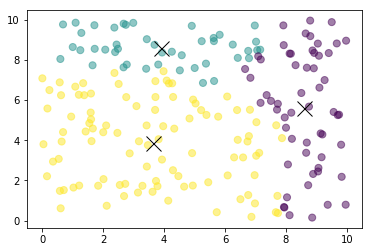

In [149]:
plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()

In [150]:
sess.close()